In [1]:
pip install tensorflow==2.8.0

In [2]:
import os
from glob import glob
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import itertools
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve,KFold,cross_val_score,StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Activation,Dense, Dropout, Flatten

from keras.models import Model

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
''' Data Path '''
train_path = '/content/drive/MyDrive/ORAL_CANCER'

In [5]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['OSCC', 'NORM']


In [6]:
''' reading equal images for both GBM and LGG
    ie., 300 images for GBM and 300 images for LGG

 '''

train_data = []
n_of_images=500

''' label encoding '''
mapping={'GBM':0, 'LGG':1}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    t=0
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])
        t+=1
        if t==n_of_images:
          break
    count=count+1

In [7]:
train_images, train_labels = zip(*train_data)

In [8]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(1000, 150, 150, 3)
(1000, 2)


In [ ]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)

In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.1,random_state=44)

In [ ]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(698, 150, 150, 3)
(78, 150, 150, 3)
(698, 2)
(78, 2)


In [ ]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

####### Working with MOBILENEt MODEL #######

In [ ]:
import tensorflow as tf
model1 = tf.keras.applications.mobilenet.MobileNet(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')
''' freezing layers '''
model1.trainable = False

171458560/171446536 [==============================] - 1s 0us/step


In [ ]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(2, activation='sigmoid')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
''' training '''
history = model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
29/29 [==============================] - 5s 158ms/step - loss: 0.3091 - accuracy: 0.8656 - val_loss: 0.2986 - val_accuracy: 0.8700
Epoch 2/25
29/29 [==============================] - 7s 241ms/step - loss: 0.2660 - accuracy: 0.8856 - val_loss: 0.2986 - val_accuracy: 0.8700
Epoch 3/25
29/29 [==============================] - 5s 155ms/step - loss: 0.2590 - accuracy: 0.8811 - val_loss: 0.2959 - val_accuracy: 0.8600
Epoch 4/25
29/29 [==============================] - 4s 154ms/step - loss: 0.2871 - accuracy: 0.8678 - val_loss: 0.2692 - val_accuracy: 0.8700
Epoch 5/25
29/29 [==============================] - 8s 275ms/step - loss: 0.2858 - accuracy: 0.8778 - val_loss: 0.3296 - val_accuracy: 0.8600
Epoch 6/25
29/29 [==============================] - 5s 157ms/step - loss: 0.2391 - accuracy: 0.8989 - val_loss: 0.2764 - val_accuracy: 0.8900
Epoch 7/25
29/29 [==============================] - 5s 172ms/step - loss: 0.2393 - accuracy: 0.8967 - val_loss: 0.3302 - val_accuracy: 0.8800
Epoch 

In [ ]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

NameError: ignored

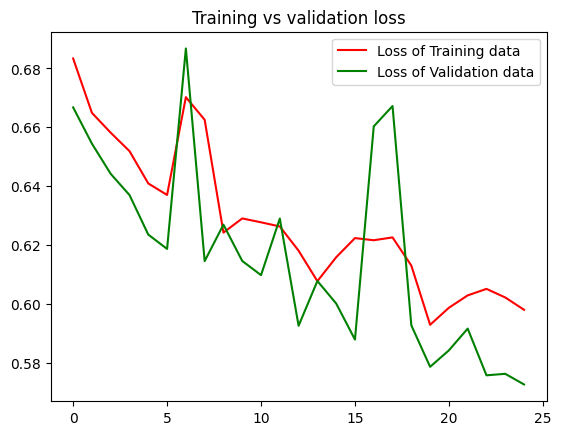

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training loss and validation loss graph '''
epochs = range(25)
plt.plot(epochs, history.history['loss'], 'r', label='Loss of Training data')
plt.plot(epochs, history.history['val_loss'], 'g', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

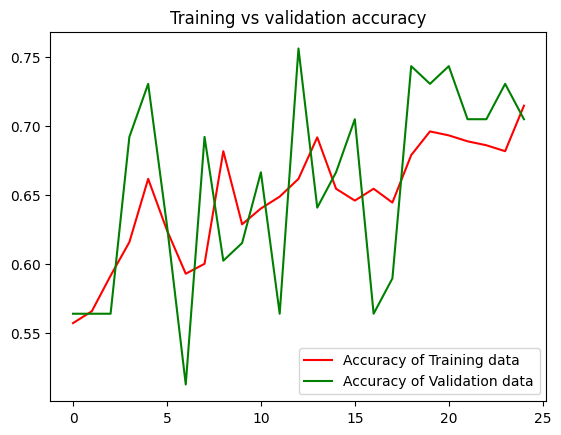

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training accuracy and validation accuracy graph '''
epochs = range(25)
plt.plot(epochs, history.history['accuracy'], 'r', label='Accuracy of Training data')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
''' checking accuracy score'''
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
accuracy = accuracy_score(y_test_arg, Y_pred)
print(accuracy)

0.7051282051282052


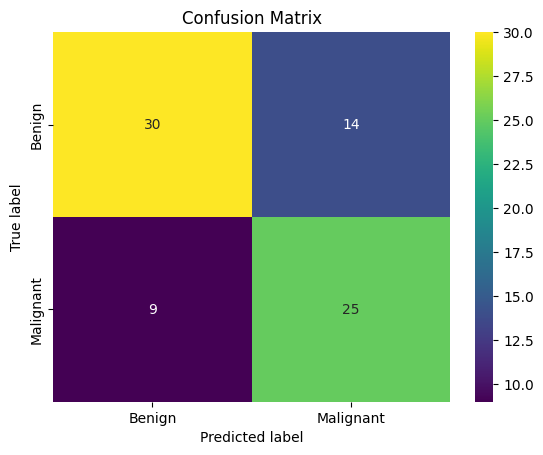

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_arg, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d', cmap= 'viridis');
# labels, title and ticks
f.set_xlabel('Predicted label');f.set_ylabel('True label');
f.set_title('Confusion Matrix');
f.xaxis.set_ticklabels(['Benign', 'Malignant']); f.yaxis.set_ticklabels(['Benign', 'Malignant']);

In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)

# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,2)}')
print(f'Mis-Classification: {round(conf_misclassification,2)}')
print(f'Sensitivity: {round(conf_sensitivity,2)}')
print(f'Specificity: {round(conf_specificity,2)}')
print(f'Precision: {round(conf_precision,2)}')
print(f'f_1 Score: {round(conf_f1,2)}')

True Positives: 25
True Negatives: 30
False Positives: 14
False Negatives: 9
--------------------------------------------------
Accuracy: 0.71
Mis-Classification: 0.29
Sensitivity: 0.74
Specificity: 0.68
Precision: 0.68
f_1 Score: 0.71


In [ ]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate NPV
conf_NPV = (TN / float(TN + FN))
# calculate f_1 score
conf_f1 = 4 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}')
print(f'Mis-Classification: {round(conf_misclassification,4)}')
print(f'Sensitivity: {round(conf_sensitivity,4)}')
print(f'Specificity: {round(conf_specificity,4)}')
print(f'Precision: {round(conf_precision,4)}')
print(f'NPV: {round(conf_NPV,4)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.7051
Mis-Classification: 0.2949
Sensitivity: 0.7353
Specificity: 0.6818
Precision: 0.6818
NPV: 0.7692
f_1 Score: 1.42


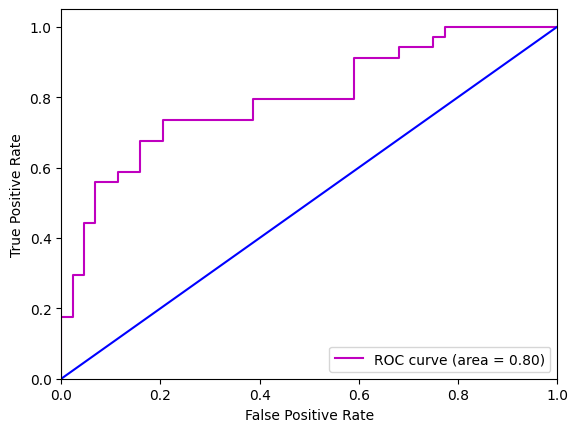

--------------------------------------------------
Accuracy: 0.7051
Mis-Classification: 0.2949
Sensitivity: 0.7353
Specificity: 0.6818
Precision: 0.6818
NPV: 0.7692
f_1 Score: 1.42


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

# Calculate mis-classification
conf_misclassification = 1 - conf_accuracy

# Calculate sensitivity
conf_sensitivity = (TP / float(TP + FN))

# Calculate specificity
conf_specificity = (TN / float(TN + FP))

# Calculate precision
conf_precision = (TN / float(TN + FP))

# Calculate NPV
conf_NPV = (TN / float(TN + FN))

# Calculate f_1 score
conf_f1 = 4 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

# Calculate predicted probabilities
y_scores = model.predict_on_batch(X_test)[:, 1]  # Assuming you have a model and input data (X) available

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_arg, y_scores)  # Replace y_true with your true labels

# Calculate AUC score
auc = roc_auc_score(y_test_arg, y_scores)  # Replace y_true with your true labels

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, 'm', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'b')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print('-' * 50)
print(f'Accuracy: {round(conf_accuracy, 4)}')
print(f'Mis-Classification: {round(conf_misclassification, 4)}')
print(f'Sensitivity: {round(conf_sensitivity, 4)}')
print(f'Specificity: {round(conf_specificity, 4)}')
print(f'Precision: {round(conf_precision, 4)}')
print(f'NPV: {round(conf_NPV, 4)}')
print(f'f_1 Score: {round(conf_f1, 2)}')
